# **データマイニングと情報可視化: レポート**
# **Data mining and information visualization: Assignment**
<font size="4">
第7回　2023年1月30日(火)<br>
データマイニング手法3-2：回帰分析（データ解析と可視化）<br>
Method 3-2: Regression (Analyze data &amp; visualization)<br>
</font>

<span style="color: red;font-weight:bold; font-size:15pt;" >レポート: 締め切り 2024年2月2日(金)　23:59 JST</span>

## (0) 名前と学籍番号を表示してください。/ Please display your name and student ID.

In [1]:
# print 関数を使って下さい / Use print function.
print("一瀬遥希")
print("1TE22028G")

一瀬遥希
1TE22028G


## (1) ロジスティック回帰分析とは / What is Logistic Regression??
線形回帰分析とロジスティック回帰分析の違いを説明してください。<br>
それぞれ、どのようなデータの分析に適しているか、簡潔に述べてください。<br>
Please explain the difference between linear regression analysis and logistic regression analysis. <br>
Briefly describe the type of data that each is suitable for analyzing.

### 
線形回帰分析は1つもしくは複数の説明変数と目的変数の関係を数式としてモデル化するもので、ロジスティック回帰分析は説明変数から目的変数が起こる確率を求めるものである。なお、このロジスティック回帰分析の目的変数は線形回帰分析とは異なり、2値の結果を示すようになっている。<br>
そのため、線形回帰分析では様々な変数との相関をみながら分析できることから、売上予測や住宅価格の予想などに適していて、ロジスティック回帰分析は確率を算出できることから顧客の購入可能性や患者の疾患の診断に適していると考えられる。

## (2) 必要なライブラリをインポートしてください。 / Import libraries.

In [2]:
# まずはライブラリをインポート / Import the libraries.
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ / Visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ / Machine learning library
import sklearn

from sklearn.metrics import confusion_matrix

# 問題設定 / Problem setting

5つの列を持つデータセットがあります。<br>
ここで、与えられたパラメータで人が車を買うかどうかを予測できるモデルを構築しましょう。<br>

We have a Data set having 5 columns. <br>
Now we have to build a model that can predict whether on the given parameter a person will buy a car or not.<br>

* User ID: ユーザーID
* Gender: 性別
* Age: 年齢
* AnnualSalary: 推定年収 ($) / Estimated annual salary ($)
* Purchased: 車を買ったかどうか (0: 買わなかった、1:買った) / Whether the user bought a car or not (0: did't buy, 1: did buy)

その他参考サイト<br>
[Logistic regression](https://realpython.com/logistic-regression-python/)<br>
https://datatofish.com/logistic-regression-python/

## (3) CSVファイル(w7_car_data_nan.csv)を読み込む / Load a csv file, w7_car_data_nan.csv

初めの5行を表示してください。<br>
Please display the first 5 rows.<br>
[Week 2: readcsv](Ex_Week2.ipynb#readcsv)<br>
[Week 2: head](Ex_Week2.ipynb#head)<br>

In [3]:
df = pd.read_csv('data/w7_car_data_nan.csv')

## (4) それぞれの項目のデータ数をチェック / Check the number of data in each column.

[Week 7: count](Ex_Week7.ipynb#count)

In [4]:
df.count()

User ID         997
Gender          995
Age             993
AnnualSalary    994
Purchased       996
dtype: int64

## (5) 欠損値が全部でいくつあるか確認して、欠損値を一つでも含む行をすべて削除
Count the total number of NaN, then delete all rows that contain even one NaN.

欠損値を削除した結果は、別の名前のデータフレームに格納してください。<br>
The result of removing NaN should be stored in a data frame with a different name.

[Week 4: isnull](Ex_Week4.ipynb#isnull)<br>
[Week 4: removenan](Ex_Week4.ipynb#removenan)

In [5]:
# 欠損値の数の合計 / the total number of NaN
print(df.isnull().sum())

# 欠損値を一つでも含む行をすべて削除 / Delete all rows that contain even one NaN
df2 = df.dropna(how='any')

# 欠損値の数がゼロになることを確認 / Verify there is no NaN.
print(df2.isnull().sum())


User ID         3
Gender          5
Age             7
AnnualSalary    6
Purchased       4
dtype: int64
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


In [6]:
df2.shape

(977, 5)

## (6) 性別ごとに車を買った人と買わなかった人の数を棒グラフでプロット
Plot a bar chart showing the number of people who bought and did not buy a car by gender.<br>

**欠損値を削除した後のDataFrameを使いましょう。**
<br>
**Let's use the DataFrame AFTER removing missing values.**

[Week 7: barchart](Ex_Week7.ipynb#barchart)

<Axes: xlabel='Purchased', ylabel='count'>

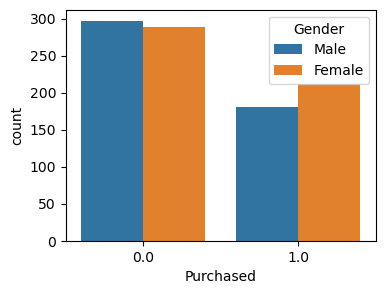

In [7]:
plt.figure(figsize=(4,3))
sns.countplot(x='Purchased', hue='Gender', data=df2)

## (7) 車を買った人と買わなかった人の年収のヒストグラムをプロット
Plot histograms of annual salary for those who bought a car and those who did not.<br>

**欠損値を削除した後のDataFrameを使いましょう。**<br>
**Let's use the DataFrame AFTER removing missing values.**

[Week 7: barchart](Ex_Week7.ipynb#barchart)

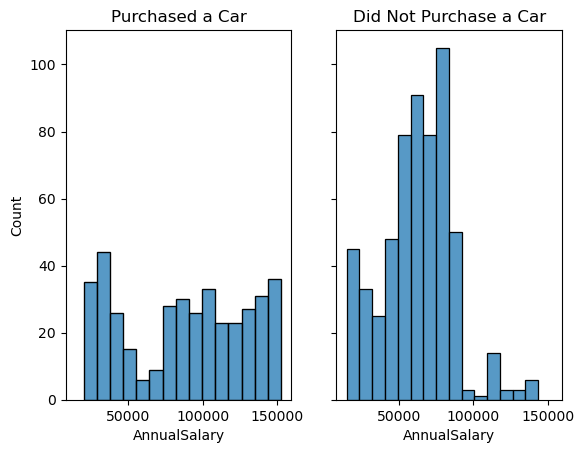

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


bin_count = 15

# X軸とY軸の範囲を共有
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)

# 車を購入した顧客の年収のヒストグラム
sns.histplot(df2[df2['Purchased'] == 1]['AnnualSalary'], ax=axes[0], bins=bin_count)
axes[0].set_title('Purchased a Car')

# 車を購入しなかった顧客の年収のヒストグラム
sns.histplot(df2[df2['Purchased'] == 0]['AnnualSalary'], ax=axes[1], bins=bin_count)
axes[1].set_title('Did Not Purchase a Car')

# グラフの表示
plt.show()


## (8) 車を買った人と買わなかった人の年収の平均と標準偏差を計算して表示
Calculate the average and the standard deviation of the annual salary for those who bought a car and those who did not.<br>

**欠損値を削除した後のDataFrameを使いましょう。**<br>
**Let's use the DataFrame AFTER removing missing values.**

[Week 7: barchart](Ex_Week7.ipynb#barchart)

In [9]:
# Average and standard deviation of the annual salary of the customers who bought a car.

print(df2[df2['Purchased'] == 1]['AnnualSalary'].mean())
print(df2[df2['Purchased'] == 1]['AnnualSalary'].std())

# Average and standard deviation of the annual salary of the customers who didn't by a car.

print(df2[df2['Purchased'] == 0]['AnnualSalary'].mean())
print(df2[df2['Purchased'] == 0]['AnnualSalary'].std())


87774.23469387754
41347.5466718534
62584.61538461538
24013.340382649418


## (9) クロス集計 / Crosstab
性別ごとに、車を買った人と買わなかった人をクロス集計してください。<br>
Cross tabulate the number of people who bought and did not buy a car for females and males.<br>

[Week 7: Crosstab](Ex_Week7.ipynb#crosstab)

In [10]:
df2.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,1.0,Male,32.0,100000.0,1.0
1,2.0,Female,38.0,63500.0,0.0
2,3.0,Male,20.0,74000.0,0.0
3,4.0,Female,48.0,119000.0,1.0
4,5.0,Male,41.0,108500.0,1.0


In [11]:
df2.shape

(977, 5)

In [12]:
# Purchased, 0:didn't by a car, 1:bought a car

purchased_ct = pd.crosstab(df2['Gender'], df2['Purchased'])
purchased_ct.index = ["Male", "Female"]
purchased_ct.columns = [1.0,0.0]
purchased_ct

,1.0,0.0
Male,288,212
Female,297,180


## (10) データを標準化 / Standardize the data

'Age'と'AnnualSalary'を標準化（平均 0・分散 1）し、新しい列に保存します。<br>
<b>欠損値を削除したした後のDataFrameを使うように注意してください。</b><br>
4週目で習った方法を使ってください。できる人はScikit-learnのStandardScalerを使っても構いません。<br>

Standardize 'Age' and 'EstimatedSalary' (mean 0, variance 1) and save them in new columns.<br>
**Be careful to use the DataFrame AFTER deleting NaN.**<br>
Use the method you learned in week 4. You may use Scikit-learn's StandardScaler, if you can. <br>

[Week 4: standardization](Ex_Week4.ipynb#standardization)

In [13]:
# データを標準化 / Standardize the data
# 名前をAge_scaleとAS_scaleに変更 / Change the column names to Age_scale and AS_scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2[['Age', 'AnnualSalary']])
df2[['Age_scale', 'AS_scale']] = scaler.transform(df2[['Age', 'AnnualSalary']])

# 最初の5行を表示して確認 / Display the first 5 rows and verify you have done correctly.
df2.head()

C:\Users\harui\AppData\Local\Temp\ipykernel_31712\1576067408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Age_scale', 'AS_scale']] = scaler.transform(df2[['Age', 'AnnualSalary']])
C:\Users\harui\AppData\Local\Temp\ipykernel_31712\1576067408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Age_scale', 'AS_scale']] = scaler.transform(df2[['Age', 'AnnualSalary']])


,User ID,Gender,Age,AnnualSalary,Purchased,Age_scale,AS_scale
0,1.0,Male,32.0,100000.0,1.0,-0.750885,0.794539
1,2.0,Female,38.0,63500.0,0.0,-0.190375,-0.267422
2,3.0,Male,20.0,74000.0,0.0,-1.871905,0.038073
3,4.0,Female,48.0,119000.0,1.0,0.743809,1.347341
4,5.0,Male,41.0,108500.0,1.0,0.089880,1.041845


In [14]:
df2.shape

(977, 7)

## (11) 性別のデータを数字に変換 / Convert the data in the column, Gender, into integers.

男性は1、女性は0、の列を作って、データフレームに追加してください。<br>
Convert 'Male' to 1 and 'Female' to 0, and store it in a Series. Then add it to the data frame.<br>


[Week 7: Convert string: 文字列を数字に変換](Ex_Week7.ipynb#convert_str)<br>
[pandasでカテゴリ変数をダミー変数に変換: get_dummies](https://note.nkmk.me/python-pandas-get-dummies/)

In [15]:
Gender = pd.get_dummies(df2["Gender"], drop_first=True)
print(Gender.head())

# 元のデータフレームに追加したい

df2 = pd.concat([df2, Gender], axis=1)
print(df2.head())



    Male
0   True
1  False
2   True
3  False
4   True
   User ID  Gender   Age  AnnualSalary  Purchased  Age_scale  AS_scale   Male
0      1.0    Male  32.0      100000.0        1.0  -0.750885  0.794539   True
1      2.0  Female  38.0       63500.0        0.0  -0.190375 -0.267422  False
2      3.0    Male  20.0       74000.0        0.0  -1.871905  0.038073   True
3      4.0  Female  48.0      119000.0        1.0   0.743809  1.347341  False
4      5.0    Male  41.0      108500.0        1.0   0.089880  1.041845   True


## (12) 目的変数と説明変数をDataFrameに格納 / Store the objective and explanatory variable to DataFrames.

説明変数として'Age_scale'、'ES_scale'、数値化された性別を、目的変数として'Purchased'をDataFrameに格納します。<br>
標準化した後のDataFrameを使うように気を付けましょう。<br>
使う変数がデータフレームの何列目にあるか、注意しましょう。<br>
Store 'Age_scale','ES_scale', and the numeric gender as explanatory variable and Purchased as objective variable.<br>
Please extract DataFrame by using the DataFrame after deleting NaN.<br>
Note carefully what columns the data you are using  are in.

[Week 7: Convert objective variable to Series](Ex_Week7.ipynb#obj_series)

In [16]:
# 説明変数のデータフレーム / DataFrame for explanatory variable
# "Age_scale","AS_scale","Male"を説明変数としてxに格納する

x = df2[["Age_scale", "AS_scale", "Male"]]

# 目的変数のデータフレーム / DataFrame for objective varialble
y = df2["Purchased"]


## (13) 分割したデータを訓練データと検証データ（7:3）に分割して、データ件数を確認
Sprit the original data set into training data and test data (for evaluation), then check the number of data after spritting the dataset.

[Week 7: Sprit data](Ex_Week7.ipynb#sprit_data)<br>
[Week 2: len](Ex_Week2.ipynb#shape)

In [17]:
# ロジスティック回帰分析に必要なパッケージ
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 訓練用と検証用データの行数を表示してください。
# Display the number of rows for training and test
# 訓練データの数
print(len(x_train))

# 検証データの数
print(len(y_test))


683
294


## (14) インスタンスを作成してモデリング
Create an instance, then apply Logistic regression

In [19]:
logmodel = LogisticRegression()

In [20]:
logmodel.fit(x_train, y_train)

LogisticRegression()

## (15) 結果のアウトプット / Output the result

In [21]:
# 偏回帰係数 / partial regression coefficient：Age_scale
print(logmodel.coef_[:,0])

# 偏回帰係数 / partial regression coefficient：Salary_scale
print(logmodel.coef_[:,1])

# 偏回帰係数 / partial regression coefficient：Gender
print(logmodel.coef_[:,2])

# 回帰定数
print(logmodel.intercept_)


[2.32662509]
[1.0706613]
[0.27417072]
[-0.89910042]


## (16) テスト用データを使って、車を買うか買わないかを予測
Predict whether to buy or not to buy a car using data for testing.

予測の結果を表示してください。<br>
Display the prediction.<br>

[Week 7: Prediction](Ex_Week7.ipynb#predict)

In [22]:
# テスト用データを使って、車を買うか買わないかを予測

predictions = logmodel.predict(x_test)

# 予測結果を表示
print(predictions)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 1.]


## (17) 混合行列を表示してください。 / Display confusion matrix

<table>
<tr>
    <td>True Negative </td>
    <td>False Potisive</td>
</tr>
<tr>
    <td>False Negative</td>
    <td>True Positive </td>
</tr>
</table>

True positive: (We predicted a positive result and it was positive)　本当の陽性<br>
True negative: (We predicted a negative result and it was negative)　本当の陰性<br>
False positive: (We predicted a positive result and it was negative)　偽陽性<br>
False negative: (We predicted a negative result and it was positive)　偽陰性<br>

       
[参考サイト：混合行列 @ note.nkmk.me](https://note.nkmk.me/python-sklearn-confusion-matrix-score/)<br>
[参考サイト：混合行列](https://qiita.com/TsutomuNakamura/items/a1a6a02cb9bb0dcbb37f)

In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[138  22]
 [ 28 106]]


## (19) ある顧客が車を買う確率を求める
Find the probability that a given customer will buy a car.

ある顧客の説明変数の値は以下のようになっています。この顧客が車を買う確率を求めなさい。<br>
The values of the explanatory variables for a given customer are as follows. Find the probability that this customer will buy a car.

* Gender = Male
* Age = 40
* AnnualSalary 	: 100000 ($)

In [24]:
# 新しい顧客データをDataFrameとして作成。
new_customer_df = pd.DataFrame({
    'Age': [40],
    'AnnualSalary': [100000],
    'Male': [1]  
})

# 'Age' と 'AnnualSalary' 列を標準化
new_customer_df[['Age', 'AnnualSalary']] = scaler.transform(new_customer_df[['Age', 'AnnualSalary']])

# 標準化されたデータにモデルが学習時に使用した特徴量名を割り当てる
new_customer_df.rename(columns={'Age': 'Age_scale', 'AnnualSalary': 'AS_scale'}, inplace=True)

# モデルで確率を予測
a = logmodel.predict_proba(new_customer_df)

# 購入する確率を表示
print(f"The probability of the customer purchasing a car is: {a[0][1]:.2f}")


The probability of the customer purchasing a car is: 0.55
